## Part 1: Importing the Data

In [327]:
import numpy as np
from sklearn.datasets import load_boston

In [328]:
boston = load_boston()
print(boston.keys())

dict_keys(['target', 'DESCR', 'data', 'feature_names'])


In [329]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [330]:
# Investigate shape of the input data array
data = boston.data
target = boston.target

print(data.shape)
print(target.shape)
print(boston.feature_names)

num_features = len(boston.feature_names)
num_samples = 506

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [332]:
# Use Pandas to get an overview of the training data

import pandas as pd
bos_dataframe = pd.DataFrame(boston.data)
bos_dataframe.columns = boston.feature_names
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [333]:
# Add in the target variable: price

bos_dataframe['PRICE'] = target
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Part 2: Setting up the Machine Learning Objective

In [308]:
# randomly initialize weights between (-1, 1)
weights_init = np.random.uniform(low=-1, high=1, size=num_features)
weights_init

array([-0.17163658, -0.71569803, -0.98551418, -0.02519959,  0.2109184 ,
        0.15067591,  0.2960999 ,  0.95328909,  0.92791931, -0.32769005,
        0.71604865,  0.47403585,  0.97226518])

In [309]:
# initialize bias to 0
bias_init = 0

In [310]:
# Normalize the input data

for i in range(num_features):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

In [311]:
# Hypothesis function: output vector of predicted prices

def hypothesis(weights, bias):
    return data.dot(weights) + np.repeat(bias, num_samples)

In [312]:
hypothesis(weights_init, bias_init).shape

(506,)

In [313]:
# Cost function: Mean-Squared Error

def cost(weights, bias):
    return np.mean(np.square(hypothesis(weights, bias) - targets))/2
cost(weights_init, bias_init)

297.57578082484935

In [314]:
# Gradient: return weight gradient vector, bias gradient at current step

def gradient(weights, bias):
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias)-targets) * data[:, weight_num])
        weight_gradients.append(grad)
        
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - targets)
    
    return (weight_gradients, bias_gradient)

In [315]:
# Check to make sure it works
# Initial gradient should be large

gradient(weights_init, bias_init)

(array([ 0.35379479, -0.80561054,  1.10655414, -0.41672805,  0.5330508 ,
        -0.51934087,  1.00813594, -0.40664155,  1.34586033,  1.05467545,
         0.47757047, -0.70535783,  1.30782365]), -22.53280632411067)

## Part 3: Training the Model

In [316]:
# Gradient descent algorithm:
# Keep calculating gradient, moving down one step
# Cost should decrease over time

LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    for i in range(num_epochs):
        weights_gradient, bias_gradient = gradient(weights, bias)
        
        weights = weights - LEARNING_RATE * weights_gradient
        bias = bias - LEARNING_RATE * bias_gradient
        costs.append(cost(weights, bias))
        
    return costs, weights, bias

In [317]:
costs, trained_weights, trained_bias = gradient_descent(weights, bias, 1000)

In [318]:
trained_weights

array([-2.1836647 ,  2.53264192, -3.0781259 ,  3.45875132, -0.92645464,
        4.47527518, -3.09592471, -0.79319292, -2.85013146, -2.57767348,
       -3.02166632,  2.01734855, -7.70054079])

In [319]:
costs[999] # ending cost

22.814004231389756

## Part 4: Evaluating the Model

In [320]:
import matplotlib.pyplot as plt

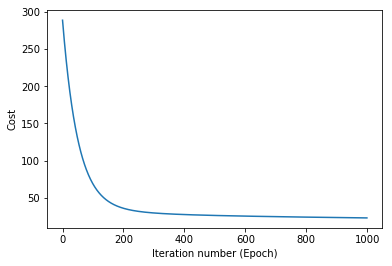

In [321]:
plt.plot(costs)
plt.xlabel("Iteration number (Epoch)")
plt.ylabel("Cost")
plt.show()

In [322]:
# Final predicted prices

new_hypotheses = hypothesis(new_weights, bias_new)

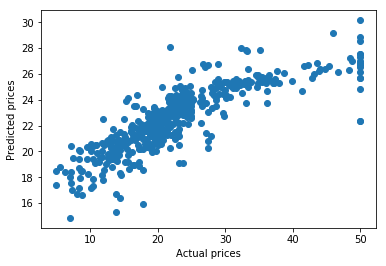

In [323]:
# Make sure predictions, actual values are correlated

plt.scatter(targets, new_hypotheses)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

** Congratulations! You just did machine learning **